In [2]:
import pandas as pd
import scipy.io as sio
from scipy import signal
import numpy as np
import matplotlib.pyplot as plt

from iFEMG_feature import db2mat, BandPassFilter, NotchFilter, show_freq_spec, show_power_spec

In [13]:
"""
转换.db至.mat数据
方便matlab读取
"""
file_list = ["bi-0", "bi-05", "bi-1", "bi-2", "tri-0", "tri-05", "tri-1", "tri-2"]
db2mat(r"E:\Data\20230424-单人双次iFEMG肌力等级测试\zpk-2", file_list)

File E:\Data\20230424-单人双次iFEMG肌力等级测试\zpk-2\bi_0.mat saved!
File E:\Data\20230424-单人双次iFEMG肌力等级测试\zpk-2\bi_05.mat saved!
File E:\Data\20230424-单人双次iFEMG肌力等级测试\zpk-2\bi_1.mat saved!
File E:\Data\20230424-单人双次iFEMG肌力等级测试\zpk-2\bi_2.mat saved!
File E:\Data\20230424-单人双次iFEMG肌力等级测试\zpk-2\tri_0.mat saved!
File E:\Data\20230424-单人双次iFEMG肌力等级测试\zpk-2\tri_05.mat saved!
File E:\Data\20230424-单人双次iFEMG肌力等级测试\zpk-2\tri_1.mat saved!
E:\Data\20230424-单人双次iFEMG肌力等级测试\zpk-2\tri-2.db doesn't exist!


[1.06063701e-254 5.25874406e-241 7.09460690e-236 ... 7.09460690e-236
 5.25874406e-241 1.06063701e-254]


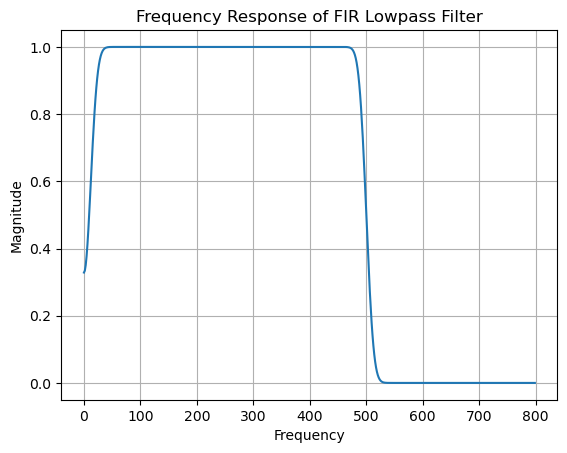

In [4]:
'''
fir 滤波器频响曲线
'''

import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

# 指定滤波器的阶数
order = 1201

# 指定带通滤波器的截止频率和带宽
fs = 1600  # 采样率
lowcut = 10  # 低频截止频率
highcut = 500 # 高频截止频率
bandwidth = highcut - lowcut  # 带宽

# 计算归一化的截止频率和带宽
nyquist = 0.5 * fs
low = lowcut / nyquist
high = highcut / nyquist
width = bandwidth / nyquist

# 设计FIR带通滤波器的系数
taps = signal.firwin(order, [low, high], pass_zero=False, width=width)

# 输出滤波器的系数
print(taps)
###########################################################################


# 计算频率响应
w, h = signal.freqz(taps)

# 绘制频率响应曲线
plt.figure()
plt.plot(w * fs / (2 * np.pi), abs(h))
plt.xlabel('Frequency')
plt.ylabel('Magnitude')
plt.title('Frequency Response of FIR Lowpass Filter')
plt.grid(True)
plt.show()

巴特沃斯滤波器是不稳定的


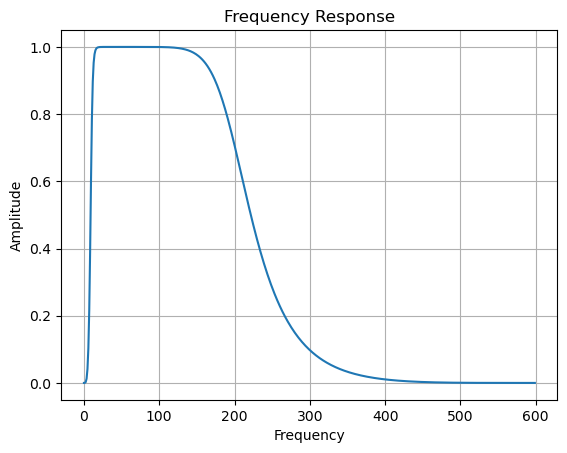

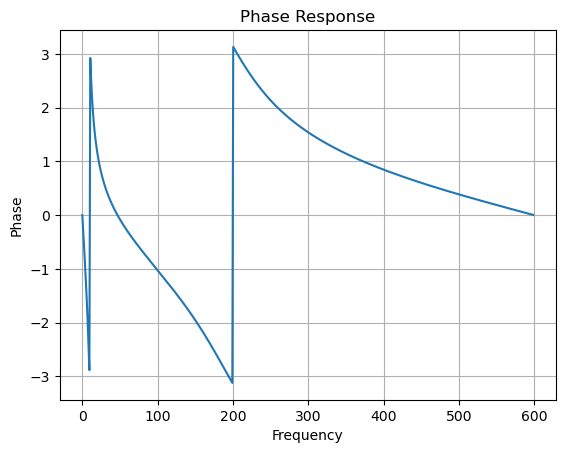

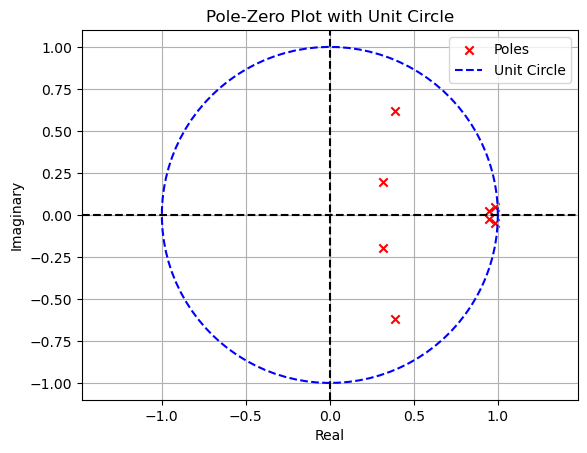

In [9]:
"""
巴特沃斯带通滤波器频响曲线
"""

import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

# 设计滤波器
passband_freq = [10, 200]  # 带通频率范围
sampling_freq = 1200  # 采样频率
filter_order = 4  # 滤波器阶数

nyquist_freq = 0.5 * sampling_freq
normalized_passband_freq = [freq / nyquist_freq for freq in passband_freq]
b, a = signal.butter(filter_order, normalized_passband_freq, btype='bandpass')

# 计算频率响应
w, h = signal.freqz(b, a)

z, p, k = signal.tf2zpk(b, a)
# 判断极点的实部是否都小于零
if np.all(np.real(p) < 0):
    print("巴特沃斯滤波器是稳定的")
else:
    print("巴特沃斯滤波器是不稳定的")

# 绘制振幅响应曲线
plt.figure()
plt.plot(w * sampling_freq / (2 * np.pi), np.abs(h))
plt.xlabel('Frequency')
plt.ylabel('Amplitude')
plt.title('Frequency Response')
plt.grid(True)

# 绘制相位响应曲线
plt.figure()
plt.plot(w * sampling_freq / (2 * np.pi), np.angle(h))
plt.xlabel('Frequency')
plt.ylabel('Phase')
plt.title('Phase Response')
plt.grid(True)

plt.show()

# 绘制极点的位置和单位圆
plt.scatter(np.real(p), np.imag(p), marker='x', color='r', label='Poles')  # 绘制极点
theta = np.linspace(0, 2*np.pi, 100)
plt.plot(np.cos(theta), np.sin(theta), linestyle='--', color='b', label='Unit Circle')  # 绘制单位圆
plt.axvline(x=0, color='k', linestyle='--')  # 实轴
plt.axhline(y=0, color='k', linestyle='--')  # 虚轴
plt.xlabel('Real')
plt.ylabel('Imaginary')
plt.title('Pole-Zero Plot with Unit Circle')
plt.axis('equal')  # 设置坐标轴比例相等
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
import numpy as np
from scipy import signal

# 设计巴特沃斯数字滤波器
order = 4
cutoff_freq = 100
b, a = signal.butter(order, cutoff_freq, 'low', analog=False)

# 获取滤波器的零点和极点
z, p, k = signal.tf2zpk(b, a)

# 判断极点的实部是否都小于零
if np.all(np.real(p) < 0):
    print("巴特沃斯滤波器是稳定的")
else:
    print("巴特沃斯滤波器是不稳定的")

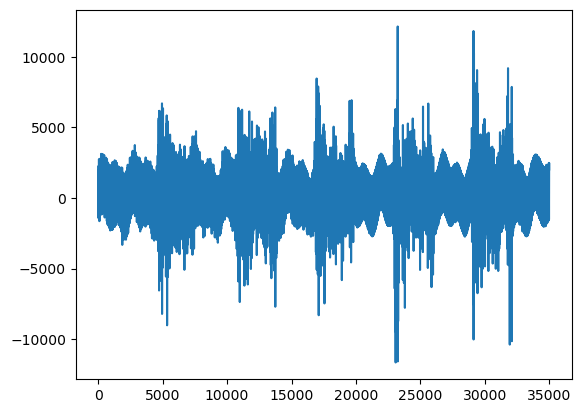

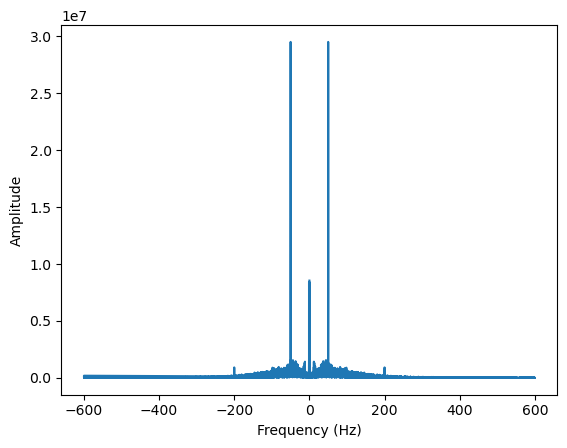

In [3]:
data = sio.loadmat(r"E:\Data\old\original_signal.mat")['original_signal'].reshape(-1)
plt.figure()
plt.plot(data)
plt.show()
show_freq_spec(data, 1200)

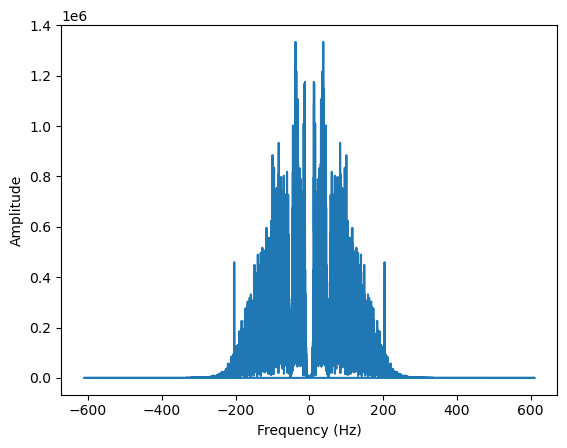

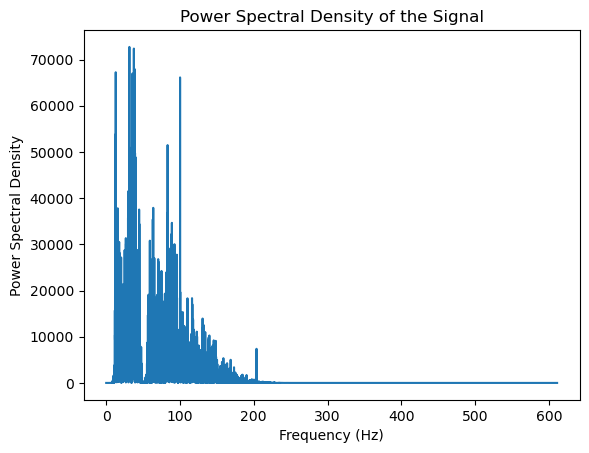

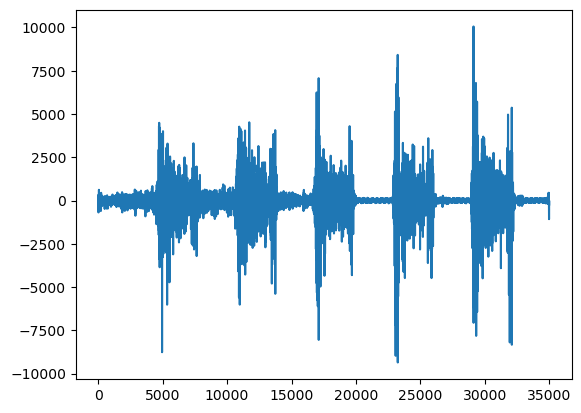

In [4]:
filter1 = NotchFilter(f0 = 50, fs = 1200, Q = 5)
bandpassfilter_10_200 = BandPassFilter(1200, 10, 200, 4)

a = filter1.filt(data)
aa = bandpassfilter_10_200.filt(a)
show_freq_spec(aa)
show_power_spec(aa)
plt.plot(aa)
plt.show()

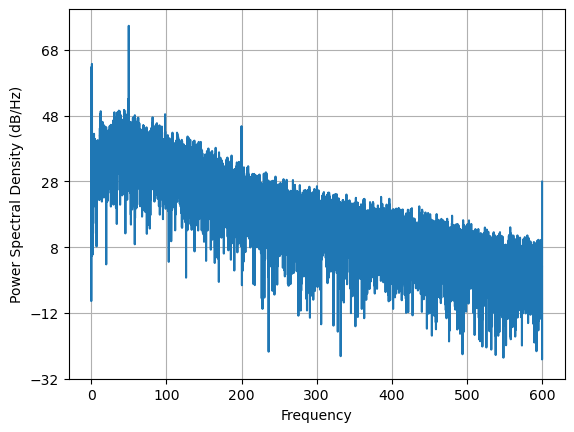

In [6]:
import matplotlib.mlab as mlab

pxx, f = plt.psd(data, NFFT = len(data), Fs = 1200, Fc = 0, detrend = mlab.detrend_none,
                            window = mlab.window_hanning, noverlap = 0, pad_to = None, 
                            sides = 'default', scale_by_freq = None, return_line = None)

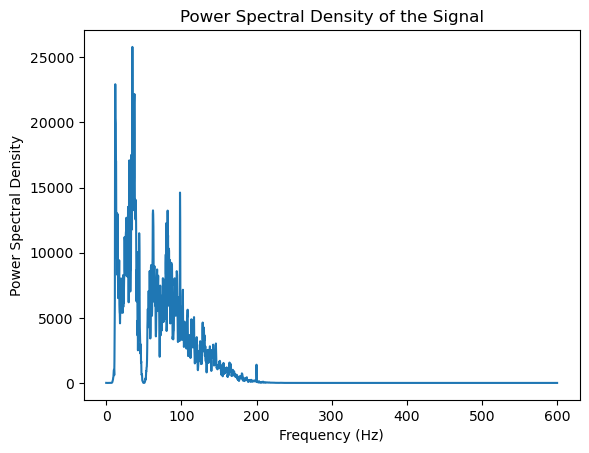

In [19]:
f, pxx = signal.welch(aa, 1200, nperseg=len(data)/8, noverlap=len(data)/16)
plt.plot(f, pxx)
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power Spectral Density')
plt.title('Power Spectral Density of the Signal')
plt.show()

In [16]:
def cal_freq_fea(data, fs, method):
    # calculate psd specture
    if method == "psd":
        pxx, f = plt.psd(data, NFFT = 256, Fs = fs, Fc = 0, detrend = mlab.detrend_none,
                        window = mlab.window_hamming, noverlap = 0, pad_to = None, 
                        sides = 'default', scale_by_freq = None, return_line = None)
        plt.close()
    elif method == "welch":
        f, pxx = signal.welch(data, fs, nperseg=len(data)/8, noverlap=len(data)/16)
    else:
        return
    '''
    scipy.signal.welch(x, fs=1.0, window='hann', nperseg=None, noverlap=None, nfft=None, detrend='constant', return_onesided=True, scaling='density', axis=- 1, average='mean')
    '''
    # med frequency
    N = len(f)
    # calculate (psd curve) integration
    MSUM = [0]
    for i in range(1, N, 1):
        MSUM.append(MSUM[i - 1] + pxx[i - 1] * (f[i] - f[i - 1]))
    
    diff = []
    for i in range(0, N, 1):
        diff.append(MSUM[i] - MSUM[N-1]/2)
    for i in range(N):
        if diff[i] <= 0 and diff[i + 1] >= 0:
            mf_x1= i
            mf_x2 = i + 1
            break
    # linear interpolation based mf calculation
    mf = (f[mf_x1]*diff[mf_x2] - f[mf_x2]*diff[mf_x1])/(diff[mf_x2] - diff[mf_x1])
    
    # average power frequency
    FSUM = [0]
    for i in range(1, N, 1):
        FSUM.append(FSUM[i - 1] + f[i] * pxx[i - 1] * (f[i] - f[i - 1]))
    mpf = FSUM[N - 1]/MSUM[N - 1]
    return mf, mpf

In [7]:
data_segment = [data[5000:7000],
                data[11000:13000],
                data[17000:18000],
                data[23000:25000],
                data[30000:32000]]

In [9]:
for i in data_segment:
    mf, mpf = cal_freq_fea(i, 1200, "psd")
    print(f"mf: {mf}, mpf: {mpf}")

mf: 52.24897390091476, mpf: 59.118005710810564
mf: 50.446144432125315, mpf: 55.90542940222241
mf: 55.14312178193827, mpf: 70.32365097339039
mf: 52.693721877137165, mpf: 63.80813481295767
mf: 52.05465384124411, mpf: 53.706140002737136


In [17]:
for i in data_segment:
    mf, mpf = cal_freq_fea(i, 1200, "welch")
    print(f"mf: {mf}, mpf: {mpf}")

mf: 51.83510181949488, mpf: 61.691559563438425
mf: 51.64634511686464, mpf: 60.29837056873225
mf: 57.74110388289992, mpf: 74.58134501650375
mf: 52.973646939058526, mpf: 67.61646744816954
mf: 52.110616168857426, mpf: 58.84267574813741


In [13]:
20//8


2

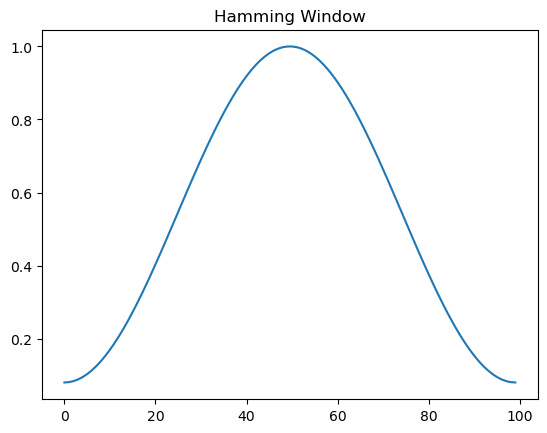

In [14]:
from scipy.signal import hamming
import matplotlib.pyplot as plt

N = 100  # 窗口长度
w = hamming(N)  # 生成汉明窗

plt.plot(w)
plt.title('Hamming Window')
plt.show()


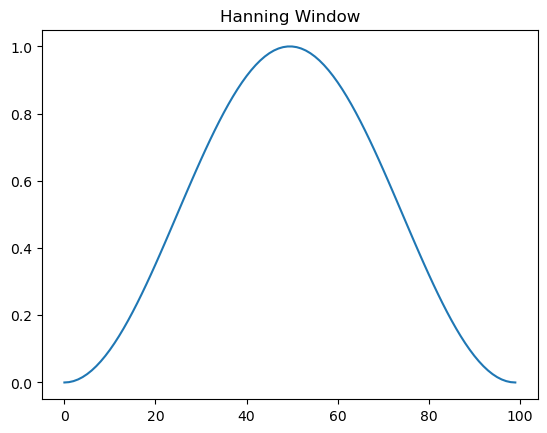

In [15]:
import numpy as np
import matplotlib.pyplot as plt

N = 100  # 窗口长度
w = np.hanning(N)  # 生成汉宁窗

plt.plot(w)
plt.title('Hanning Window')
plt.show()